<a href="https://colab.research.google.com/github/zhouchun0105/credit-card-churners/blob/main/Chun_Zhou_heatmap_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
%%bigquery df --project=ba775-team-project
SELECT *
FROM `ba775-team-project.bankchurners.bankchurners`;

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,826077033,Attrited Customer,46,F,2,Unknown,Married,Less than $40K,Blue,42,1,0,4,2002.0,0,2002.0,0.803,2423,39,0.857,0.000,0.984680,0.01532
1,709918158,Existing Customer,43,M,3,High School,Married,$80K - $120K,Blue,23,5,6,1,12315.0,0,12315.0,0.895,2028,51,0.545,0.000,0.000086,0.99991
2,714757908,Existing Customer,46,M,4,Graduate,Married,$120K +,Silver,36,4,1,3,34516.0,1380,33136.0,0.660,2163,56,0.400,0.040,0.000088,0.99991
3,721067658,Existing Customer,40,M,4,Graduate,Married,$60K - $80K,Silver,36,6,1,3,27436.0,642,26794.0,0.705,4051,81,0.761,0.023,0.000088,0.99991
4,826451433,Existing Customer,42,M,4,Graduate,Single,$80K - $120K,Silver,38,2,1,3,34516.0,2273,32243.0,0.860,8502,103,0.717,0.066,0.000088,0.99991


In [7]:
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
                      , 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace = True)

In [8]:
df.set_index('CLIENTNUM', inplace=True)

In [11]:
df_categorical = df.loc[:,df.dtypes == np.object]
print('Categorical Columns are : {}'.format(df_categorical.columns))

df_numerical = df.loc[:,df.dtypes != np.object]
print('Numerical Columns are : {}'.format(df_numerical.columns))

Categorical Columns are : Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')
Numerical Columns are : Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


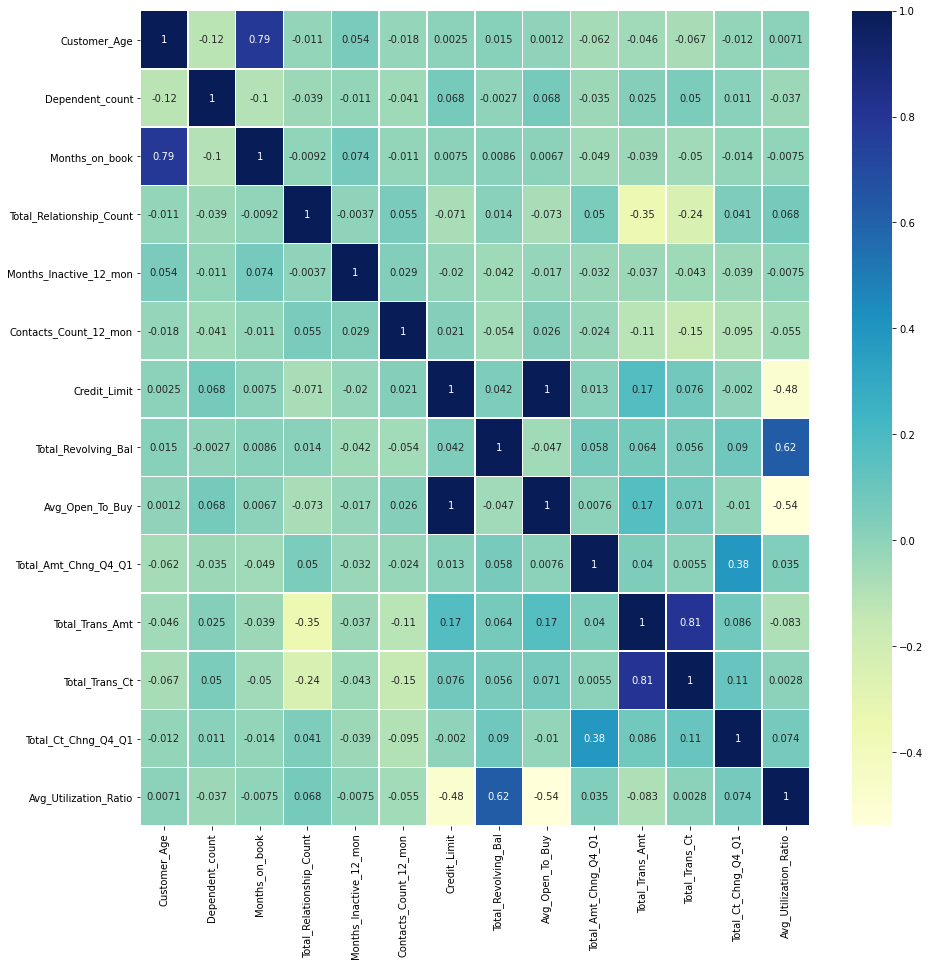

In [15]:
corr = df_numerical.corr()
plt.figure(figsize=[15,15])
plt.rcParams['font.size']=10
sns.heatmap(corr, cmap='YlGnBu', annot= True, linewidths=0.5 );